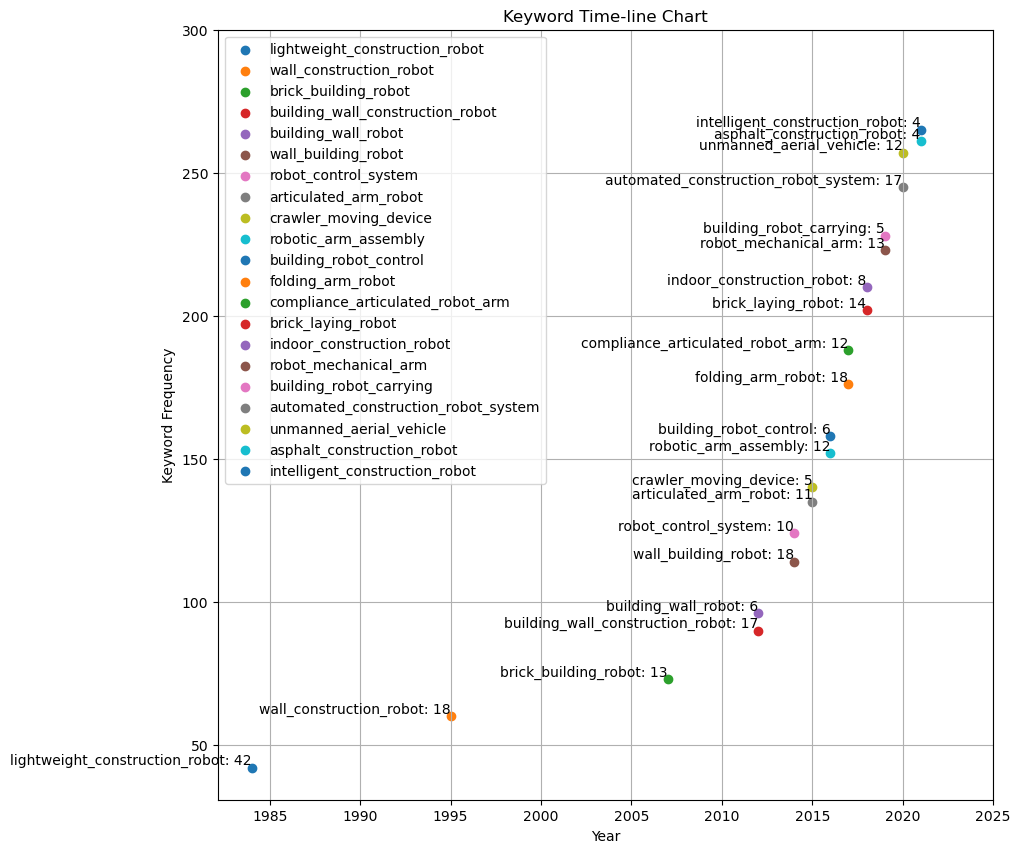

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_excel("year-fre.xlsx",sheet_name="sheet1", header=None)

# 存储关键词的出现年份和对应的频次
keyword_years = {}

for index, row in data.iterrows():
    year = row[0]
    keywords = row[1].split('; ')  # 分割关键词
    for keyword in keywords:
        if keyword.strip():  # 去除可能的空白关键词
            if keyword not in keyword_years:
                keyword_years[keyword] = {'year': year, 'count': 1}
            else:
                keyword_years[keyword]['count'] += 1

# 过滤关键词词频小于n的关键词
min_count_threshold = 3
filtered_keyword_years = {keyword: info for keyword, info in keyword_years.items() if info['count'] >= min_count_threshold}

# 每个年份只选择最大的2个关键词
max_keywords_per_year = {}
for keyword, info in filtered_keyword_years.items():
    year = info['year']
    count = info['count']
    if year not in max_keywords_per_year:
        max_keywords_per_year[year] = [{'keyword': keyword, 'count': count}]
    else:
        max_keywords_per_year[year].append({'keyword': keyword, 'count': count})
        max_keywords_per_year[year].sort(key=lambda x: x['count'], reverse=True)
        max_keywords_per_year[year] = max_keywords_per_year[year][:2]  # 最多保留2个关键词

# 生成关键词的时区图
fig, ax = plt.subplots(figsize=(10, 10))

# 存储关键词、x 值和 y 值的列表
keywords_list = []
x_values_list = []
y_values_list = []

# 绘制关键词的时区图，Y 值叠加
previous_y = 0
for year, keywords_info in max_keywords_per_year.items():
    y = previous_y
    for info in keywords_info:
        keyword = info['keyword']
        count = info['count']
        y += count

        plt.scatter(year, y, label=keyword)
        plt.text(year, y, f"{keyword}: {count}", fontsize=10, ha='right', va='bottom')

        # 添加到列表
        keywords_list.append(keyword)
        x_values_list.append(year)
        y_values_list.append(y)

    previous_y = y

plt.xlabel('Year')
plt.ylabel('Keyword Frequency')
plt.title("Keyword Time-line Chart")
plt.legend()
plt.grid()

# 设置横坐标范围至少到2025
plt.xlim(plt.xlim()[0], 2025)
plt.ylim(plt.ylim()[0], 300)
plt.show()

# 创建包含关键词、x 值和 y 值的表格
result_table = pd.DataFrame({'keyword': keywords_list, 'x-value': x_values_list, 'y-value': y_values_list})

# 保存结果到 Excel 文件
result_table.to_excel('keyword_timeline_results.xlsx', index=False)


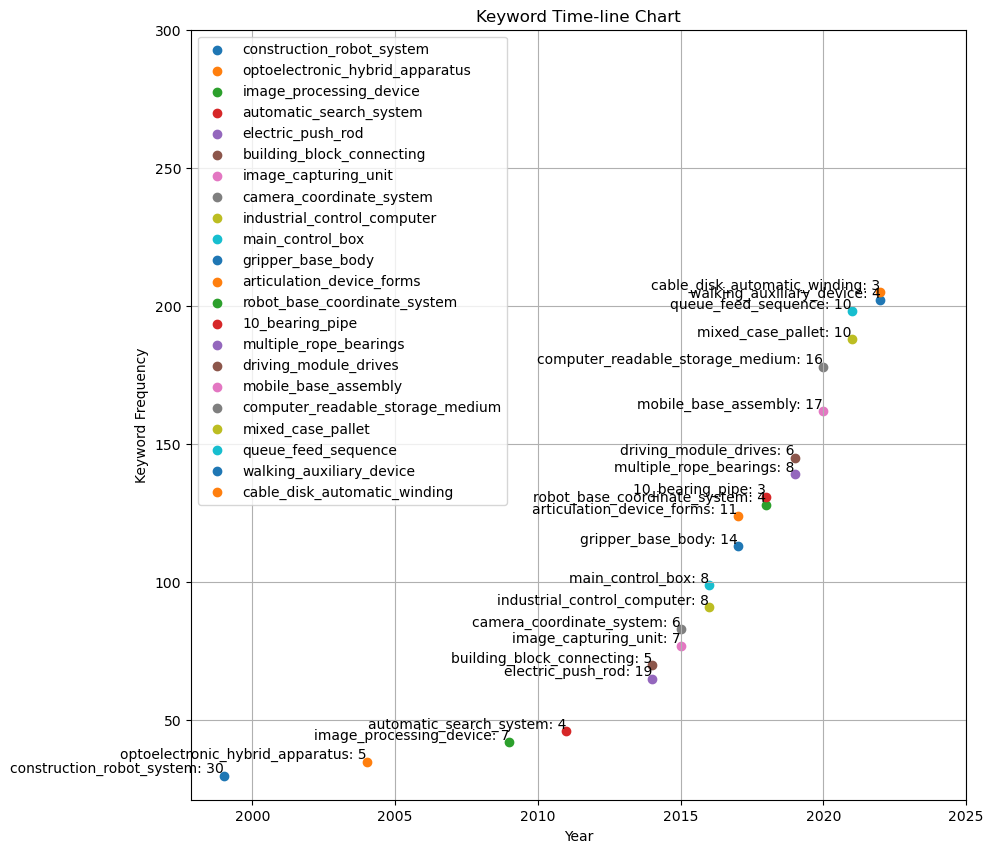

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_excel("year-fre.xlsx", sheet_name="sheet2" , header=None)

# 存储关键词的出现年份和对应的频次
keyword_years = {}

for index, row in data.iterrows():
    year = row[0]
    keywords = row[1].split('; ')  # 分割关键词
    for keyword in keywords:
        if keyword.strip():  # 去除可能的空白关键词
            if keyword not in keyword_years:
                keyword_years[keyword] = {'year': year, 'count': 1}
            else:
                keyword_years[keyword]['count'] += 1

# 过滤关键词词频小于n的关键词
min_count_threshold = 3
filtered_keyword_years = {keyword: info for keyword, info in keyword_years.items() if info['count'] >= min_count_threshold}

# 每个年份只选择最大的2个关键词
max_keywords_per_year = {}
for keyword, info in filtered_keyword_years.items():
    year = info['year']
    count = info['count']
    if year not in max_keywords_per_year:
        max_keywords_per_year[year] = [{'keyword': keyword, 'count': count}]
    else:
        max_keywords_per_year[year].append({'keyword': keyword, 'count': count})
        max_keywords_per_year[year].sort(key=lambda x: x['count'], reverse=True)
        max_keywords_per_year[year] = max_keywords_per_year[year][:2]  # 最多保留2个关键词

# 生成关键词的时区图
fig, ax = plt.subplots(figsize=(10, 10))

# 存储关键词、x 值和 y 值的列表
keywords_list = []
x_values_list = []
y_values_list = []

# 绘制关键词的时区图，Y 值叠加
previous_y = 0
for year, keywords_info in max_keywords_per_year.items():
    y = previous_y
    for info in keywords_info:
        keyword = info['keyword']
        count = info['count']
        y += count

        plt.scatter(year, y, label=keyword)
        plt.text(year, y, f"{keyword}: {count}", fontsize=10, ha='right', va='bottom')

        # 添加到列表
        keywords_list.append(keyword)
        x_values_list.append(year)
        y_values_list.append(y)

    previous_y = y

plt.xlabel('Year')
plt.ylabel('Keyword Frequency')
plt.title("Keyword Time-line Chart")
plt.legend()
plt.grid()

# 设置横坐标范围至少到2025
plt.xlim(plt.xlim()[0], 2025)
plt.ylim(plt.ylim()[0], 300)
plt.show()

# 创建包含关键词、x 值和 y 值的表格
result_table = pd.DataFrame({'keyword': keywords_list, 'x-value': x_values_list, 'y-value': y_values_list})

# 保存结果到 Excel 文件
result_table.to_excel('keyword_timeline_results_non-robot.xlsx', index=False)


In [16]:
# !pip install --upgrade pydantic typing-extensions
# !pip install --upgrade spacy
# !python -m spacy download en_core_web_sm


                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                             0.1/12.8 MB 787.7 kB/s eta 0:00:17
                                             0.1/12.8 MB 737.3 kB/s eta 0:00:18
                                             0.1/12.8 MB 714.4 kB/s eta 0:00:18
                                              0.3/12.8 MB 1.2 MB/s eta 0:00:11
     -                                        0.3/12.8 MB 1.2 MB/s eta 0:00:11
     -                                        0.3/12.8 MB 1.3 MB/s eta 0:00:10
     -                                        0.3/12.8 MB 1.3 MB/s eta 0:00:10
     -                                        0.5/12.8 MB 1.2 MB/s eta 0:00:10
     -                                        0.6/12.8 MB 1.4 MB/s eta 0:00:09
     --                                       0.8/12.8 MB 1.5 MB/s eta 0:00:08
     --                                       0.8/12.8 MB 1.6 M

In [8]:
import pandas as pd
import scattertext as st
import spacy

# 加载语言模型
nlp = spacy.load('en_core_web_sm')

# 在创建 Corpus 对象时使用加载的语言模型
corpus = st.CorpusFromPandas(data, category_col='Year', text_col='Keywords', nlp=nlp).build()

# 读取数据集
data = pd.read_excel("year-fre.xlsx", header=None)
data.columns = ['Year', 'Keywords']

# 清洗数据，将关键词分割并拆分成多行
data['Keywords'] = data['Keywords'].str.split('; ')
data = data.explode('Keywords')
data['Keywords'] = data['Keywords'].str.strip()

# 创建 Corpus 对象
corpus = st.CorpusFromPandas(data, category_col='Year', text_col='Keywords').build()

# 创建关键词的时区图
html = st.produce_scattertext_explorer(corpus,
                                       category='2023',  # 这里填入你想要查看的年份
                                       category_name='2023',  # 同样填入相应的年份
                                       not_category_name='Other Years',
                                        width_in_pixels=800,
                                       minimum_term_frequency=2)

# 保存生成的 HTML
output_path = 'scattertext_keyword_time_zone.html'
with open(output_path, 'wb') as f:
    f.write(html.encode('utf-8'))
